<a href="https://colab.research.google.com/github/artanebibi/datascience/blob/main/Data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [85]:
df = pd.read_csv("https://raw.githubusercontent.com/artanebibi/Datasets/refs/heads/main/spaceship_titanic.csv")
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,NaN,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,NaN,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,NaN,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,NaN,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,NaN,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,NaN,55 Cancri e,NaN,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


# Data Imputation

In [86]:
df.isnull().sum() / len(df) * 100

,0
PassengerId,0.000000
HomePlanet,4.612907
CryoSleep,2.496261
Cabin,78.235362
Destination,2.093639
Age,11.434488
VIP,2.335212
RoomService,2.082135
FoodCourt,2.105142
ShoppingMall,2.392730


<Axes: >

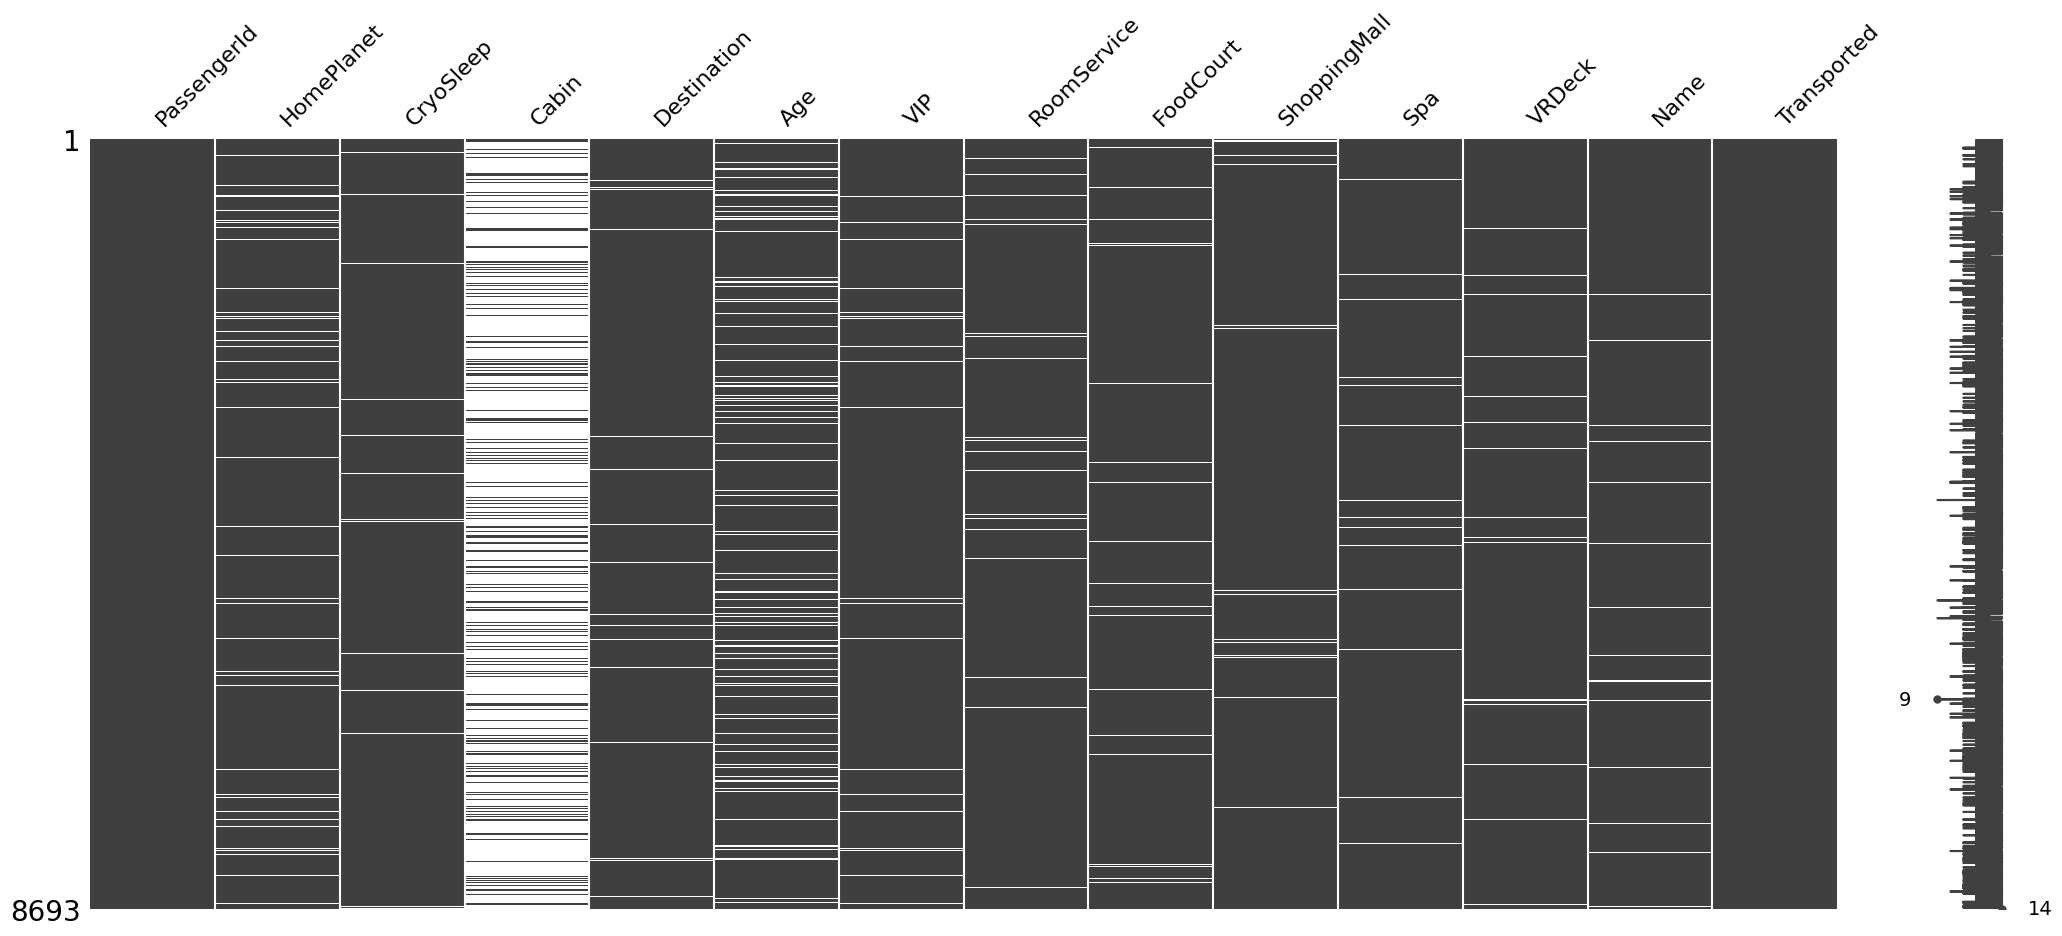

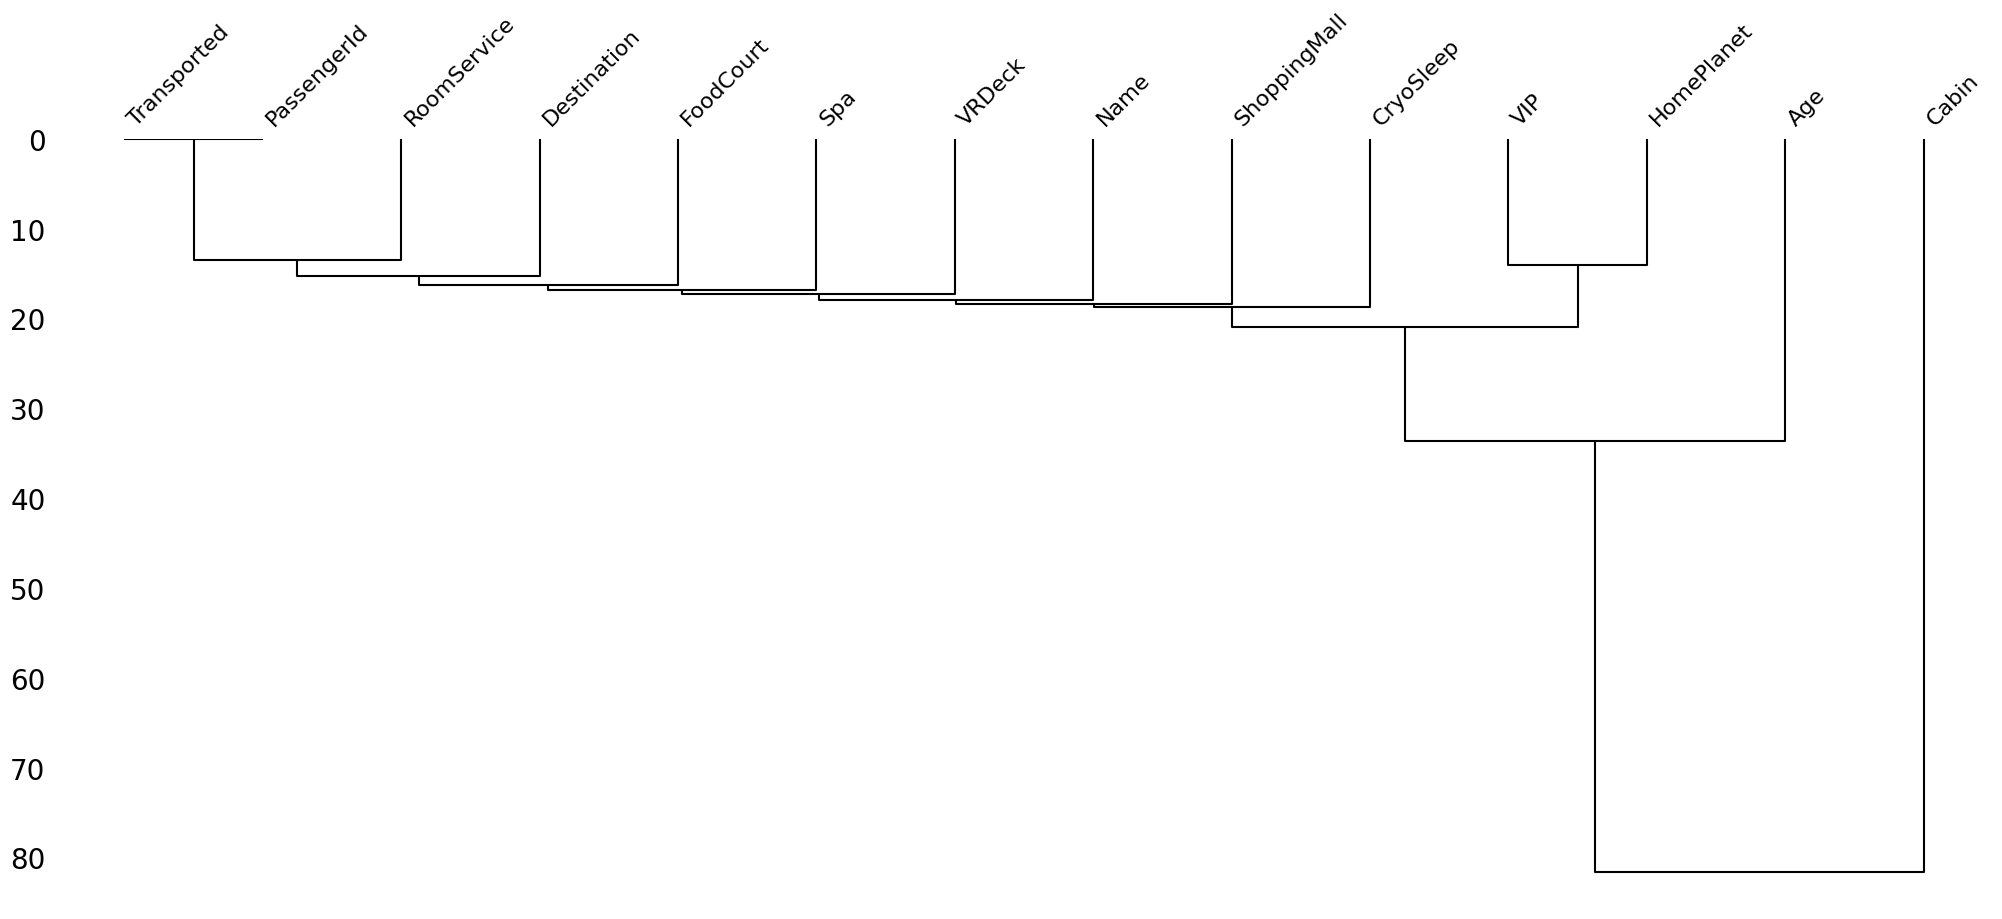

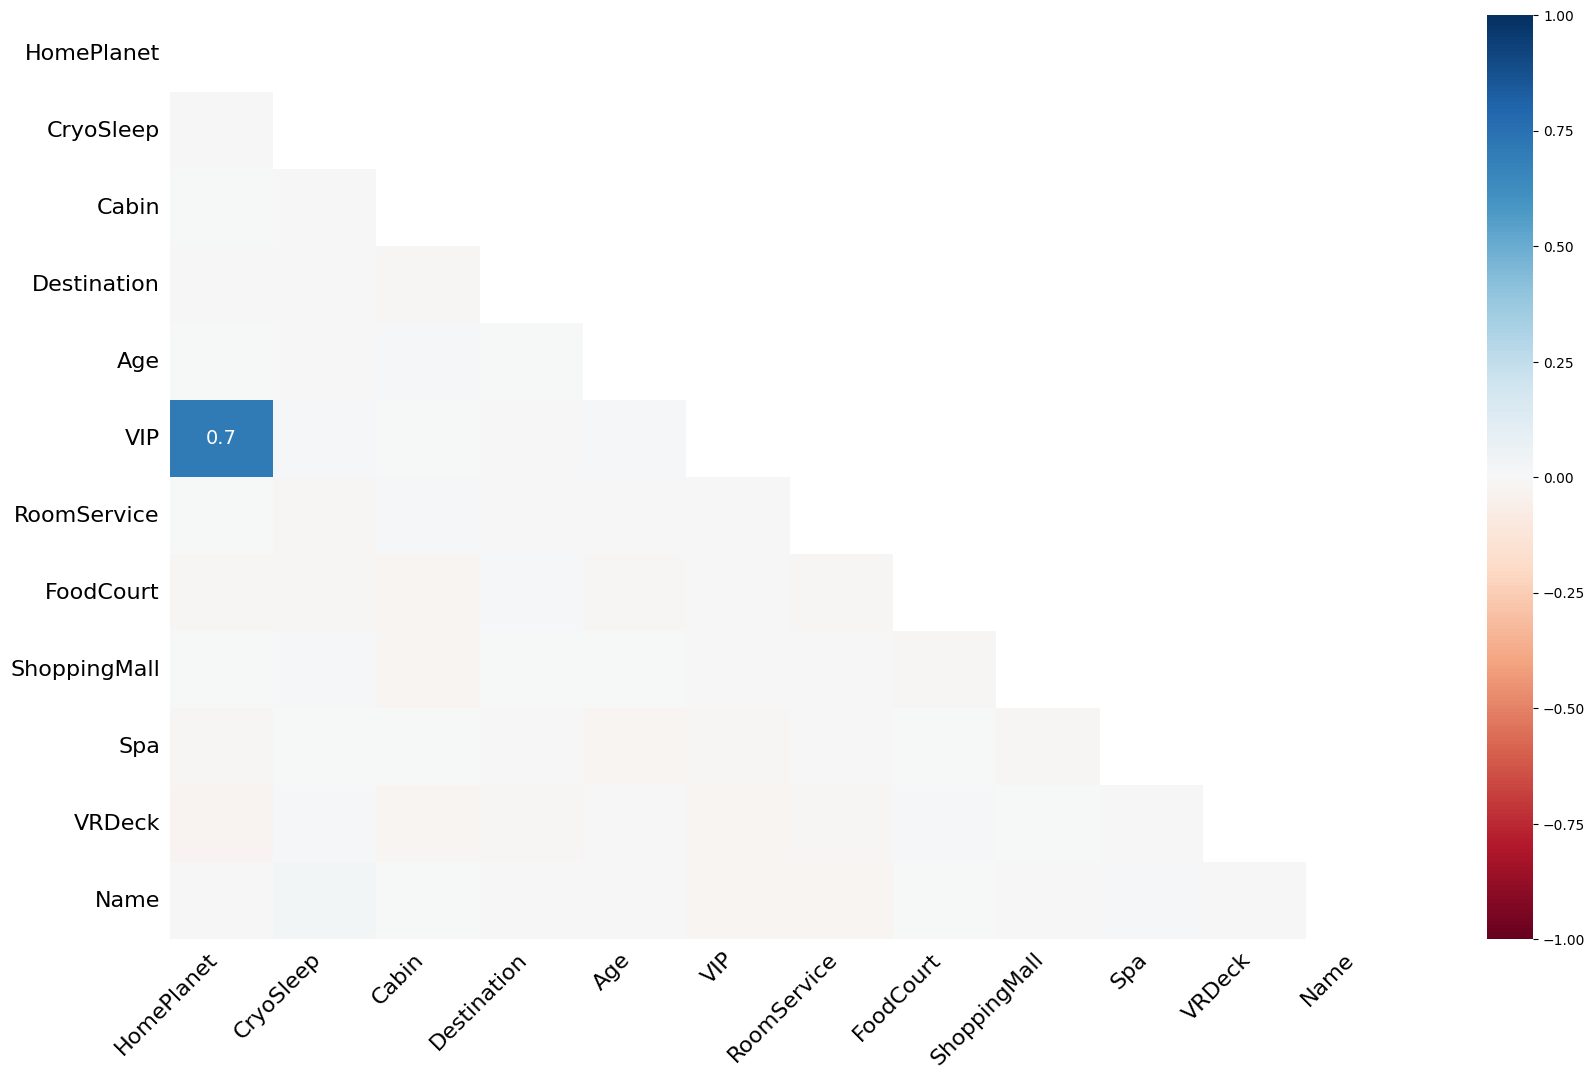

In [87]:
# looking at whether the missingness has correlation between features
msno.matrix(df)
msno.dendrogram(df)
msno.heatmap(df)

In [88]:
df.drop(columns = 'PassengerId', axis = 1, inplace = True)

In [89]:
# since the Cabin feature has more than 70% of its values missing then we can drop it
df.drop(columns='Cabin', axis=1, inplace=True)

In [90]:
df.isnull().sum()

,0
HomePlanet,401
CryoSleep,217
Destination,182
Age,994
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208
Spa,183
VRDeck,188


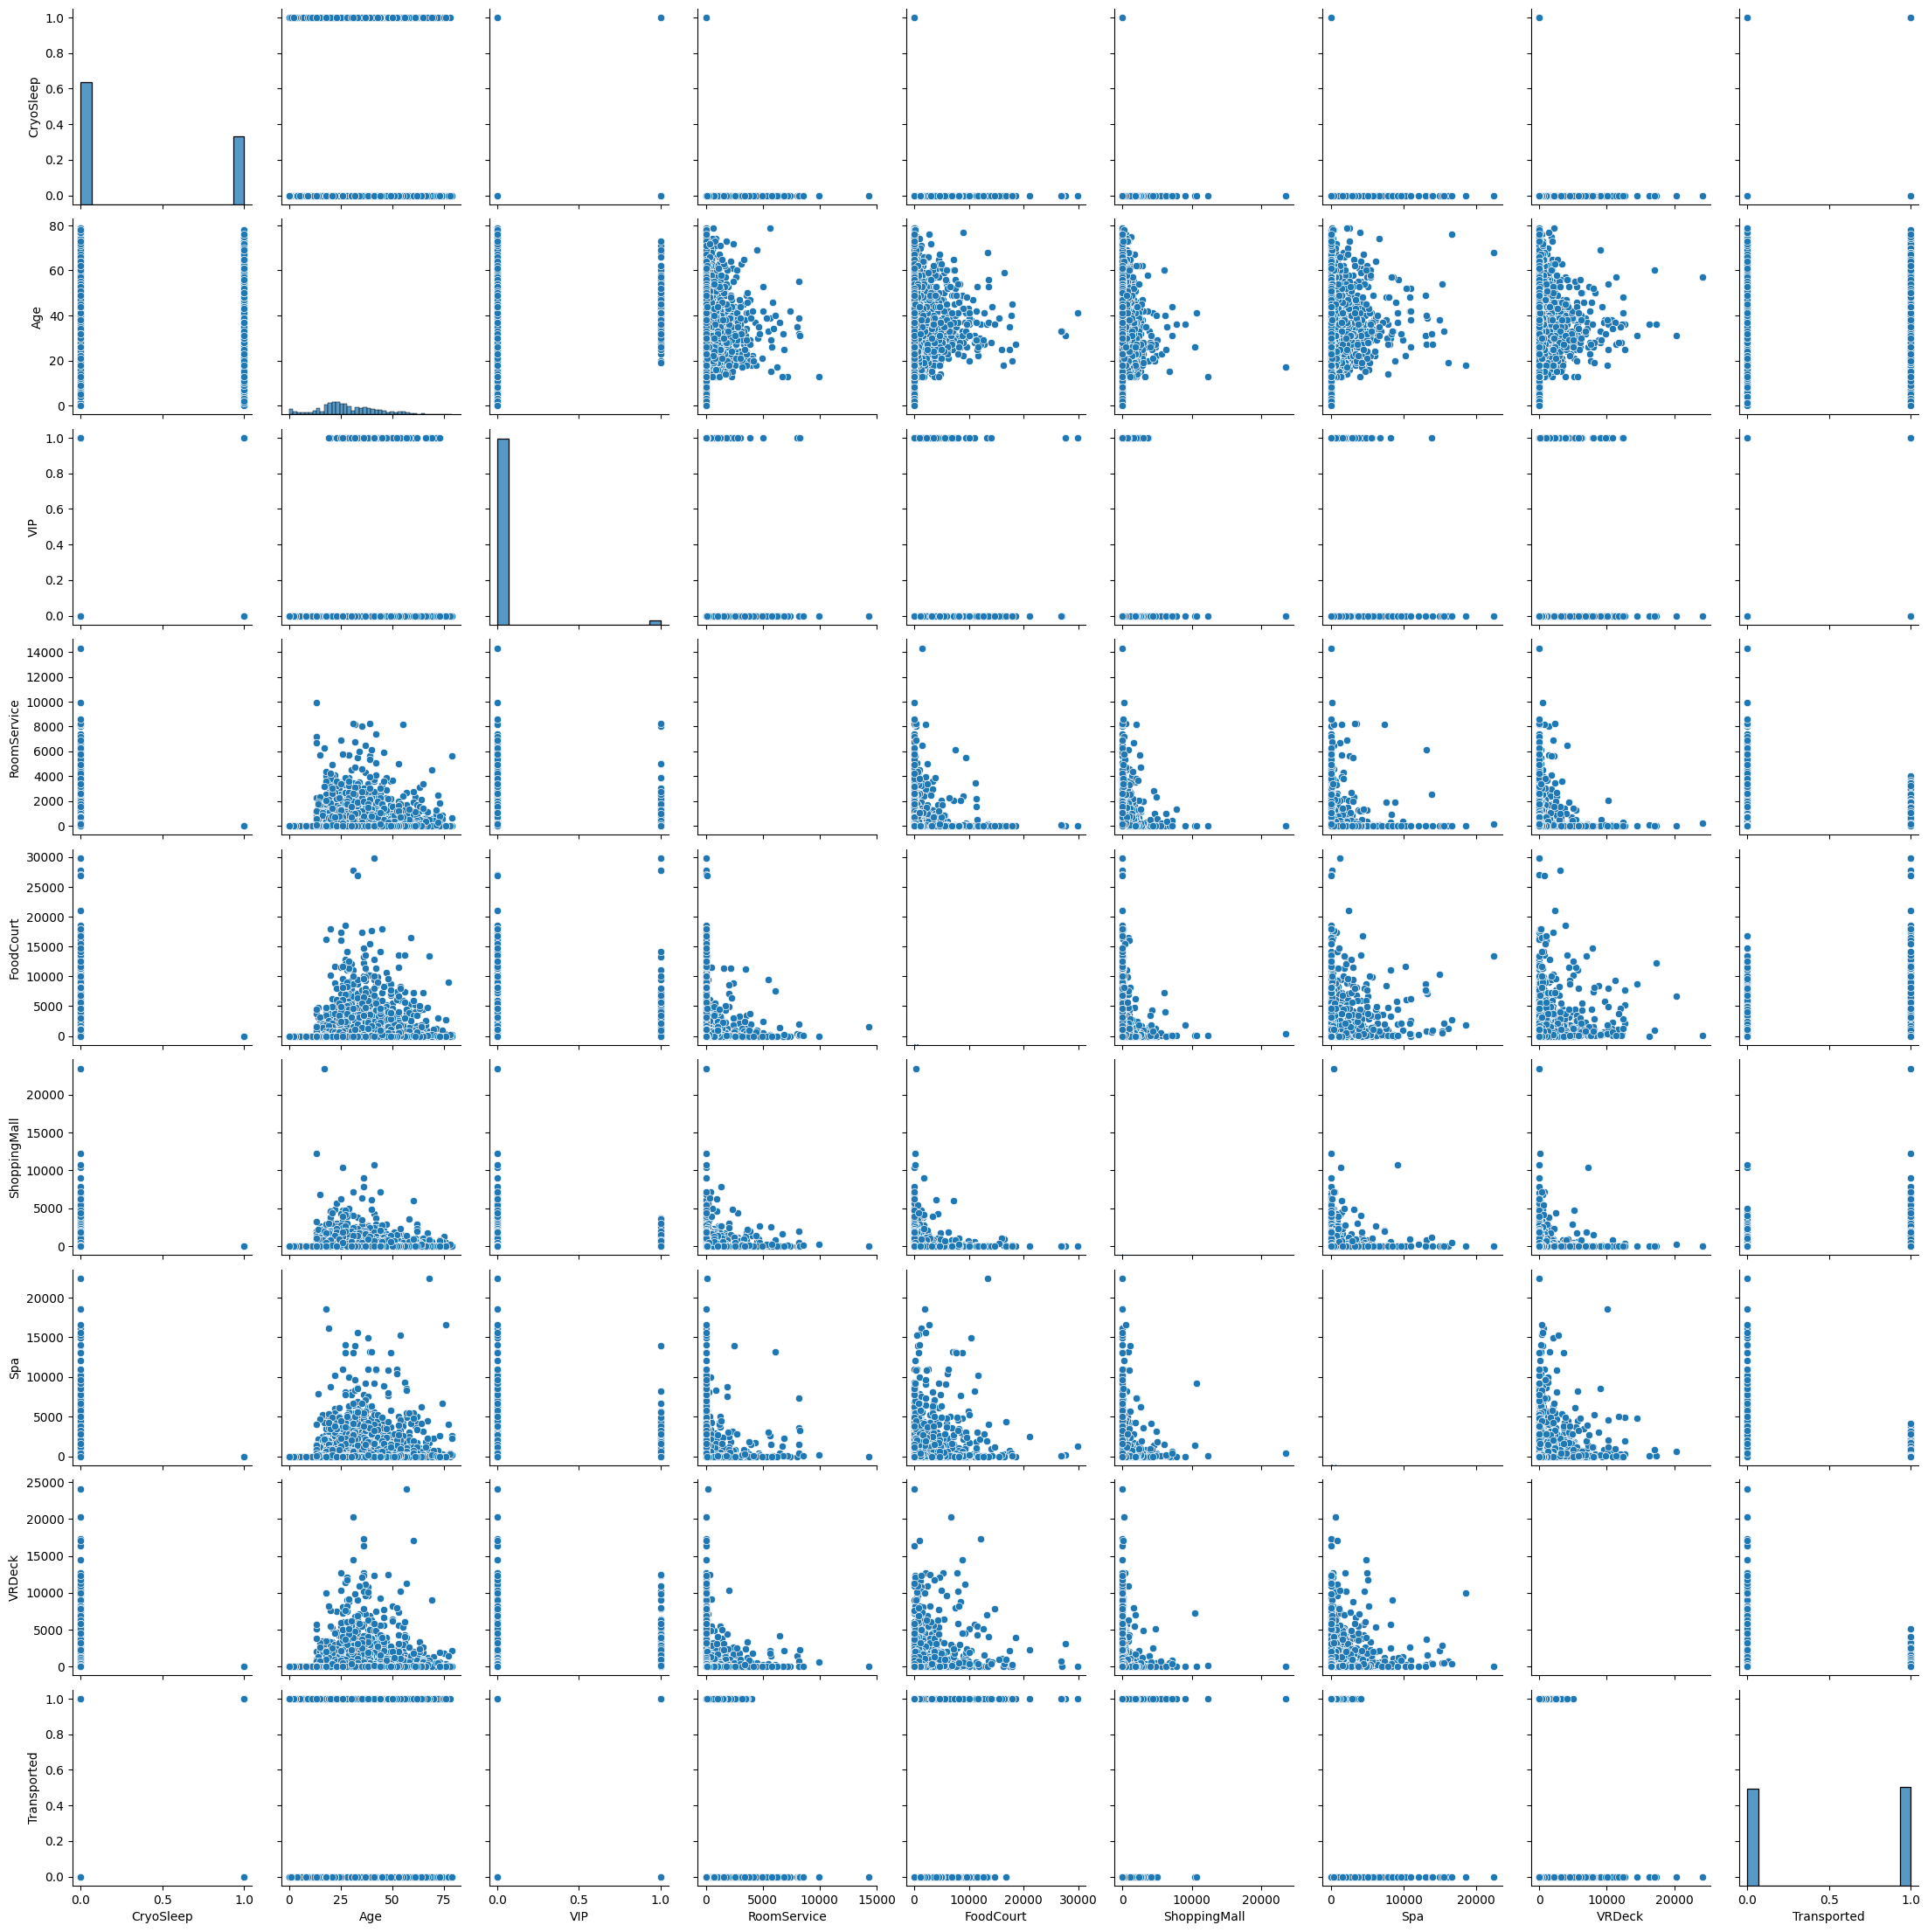

In [22]:
sns.pairplot(df)

In [46]:
df_encoded = pd.get_dummies(df, columns=['VIP', 'HomePlanet'])
df_encoded

,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,VIP_False,VIP_True,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,False,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,False,False,True,False
1,False,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,False,True,False,False
2,False,TRAPPIST-1e,NaN,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,True,False,True,False
3,False,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,True,False,False,True,False
4,False,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,55 Cancri e,41.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,False,True,False,True,False
8689,True,PSO J318.5-22,18.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,True,False,True,False,False
8690,False,TRAPPIST-1e,26.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,True,False,True,False,False
8691,False,55 Cancri e,NaN,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,True,False,False,True,False


In [55]:
for f in ['VIP_False', 'VIP_True', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars']:
  df_encoded[f] = df_encoded[f].replace(True, 1).replace(False, 0)

<Axes: >

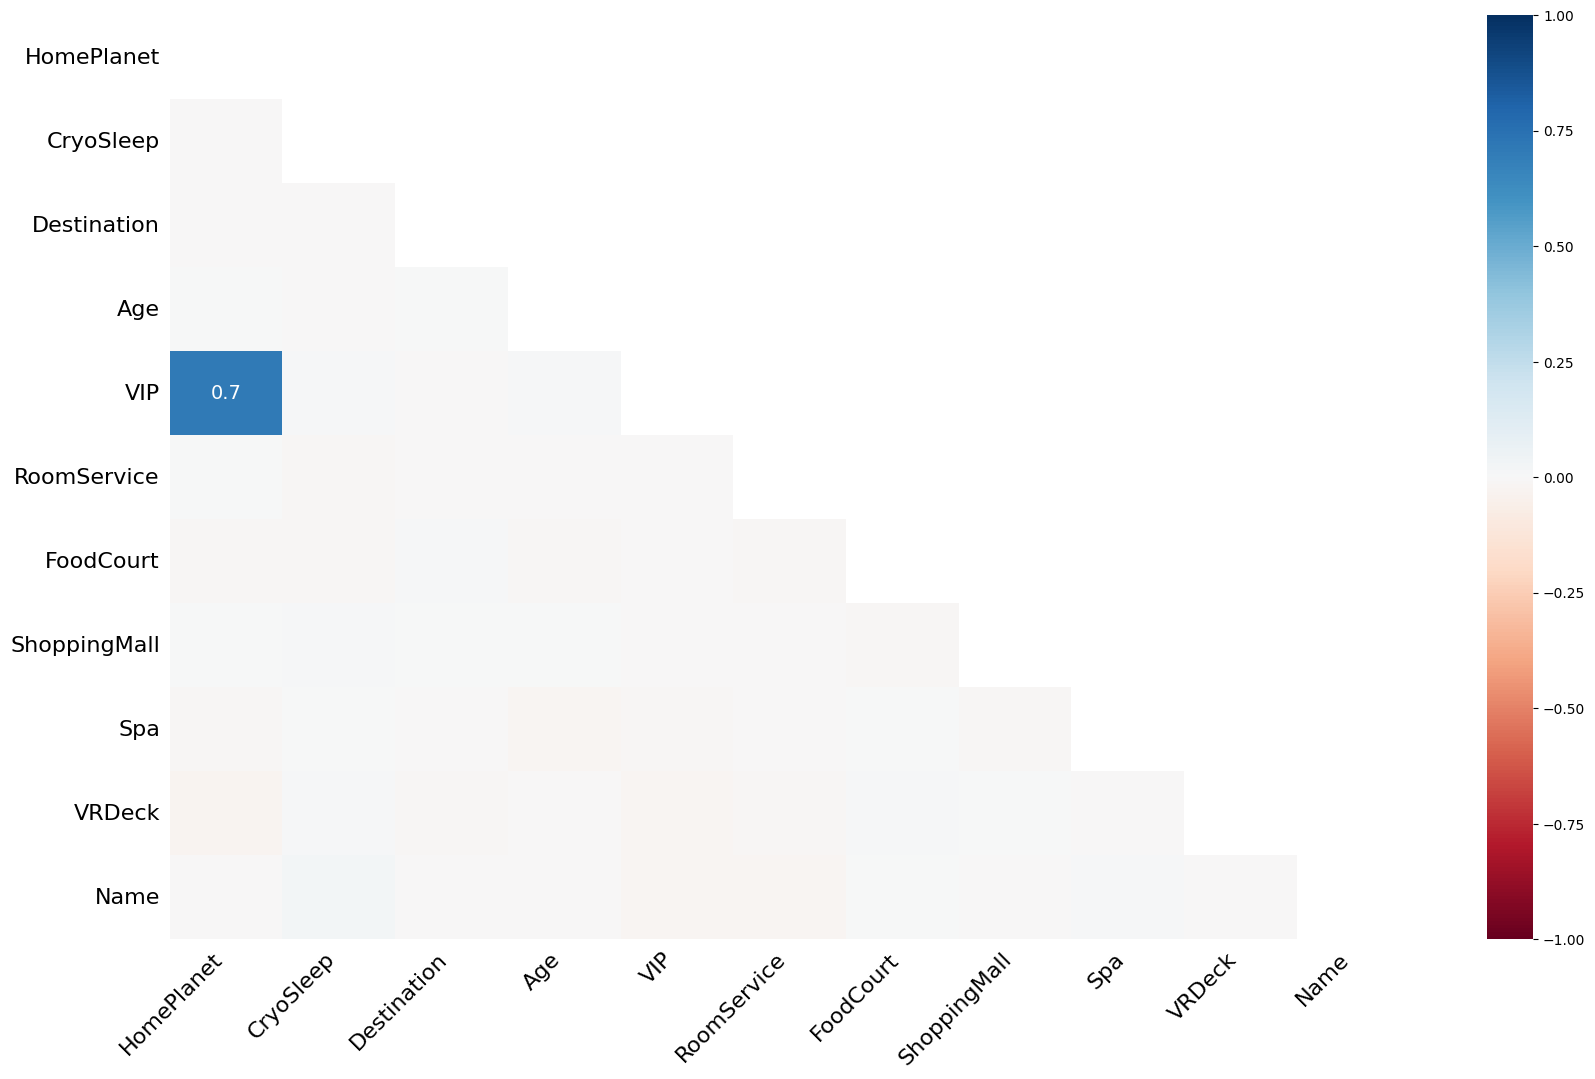

In [91]:
msno.heatmap(df)

For the imputation of the values of VIP and HomePlanet which depend on eachother in terms of missingess (as we can see above from the `msno.heatmap(df)`) i will first encode them with Ordinal Encoder because OrdinalEncoder can encode from more than one feature (in this example i need encoding from two features because the features which i am encoding are dependent between eachother) and not LabelEncoder because it can only encode at most one column / feature. The point of encoding is to have Numerical values for MICE to use. I am using MICE because it is the best method to impute two features which depend on other features, in this case `VIP` and `HomePlanet` have a correlation of missingness of `0.7`. After the imputation MICE will output some values which are not seen what the Encoder encoded which were Integers but with a decimal suffix `.0`, hence rounding is needed.
`encoder.inverse_transform` is then used to return the values back to normal (as String objects). After the imputation i will encode these values with One Hot Encoder (`pd.get_dummies`) to assume no order is present in the values of VIP: 'True' and 'False', and HomePlanet: 'Earth', 'Mars' and 'Europa'.

In [92]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df[['VIP', 'HomePlanet']] = encoder.fit_transform(df[['VIP', 'HomePlanet']])

In [93]:
mice = IterativeImputer()
imputed_values = mice.fit_transform(df[['VIP', 'HomePlanet']])
df[['VIP', 'HomePlanet']] = imputed_values.round().astype(float)

In [94]:
set(df['HomePlanet'])

{0.0, 1.0, 2.0}

In [95]:
set(df['VIP'])

{0.0, 1.0}

In [96]:
df[['VIP', 'HomePlanet']] = encoder.inverse_transform(df[['VIP', 'HomePlanet']])

In [97]:
df[['VIP', 'HomePlanet']]

,VIP,HomePlanet
0,False,Europa
1,False,Earth
2,True,Europa
3,False,Europa
4,False,Earth
...,...,...
8688,True,Europa
8689,False,Earth
8690,False,Earth
8691,False,Europa


In [98]:
df.isnull().sum()

,0
HomePlanet,0
CryoSleep,217
Destination,182
Age,994
VIP,0
RoomService,181
FoodCourt,183
ShoppingMall,208
Spa,183
VRDeck,188


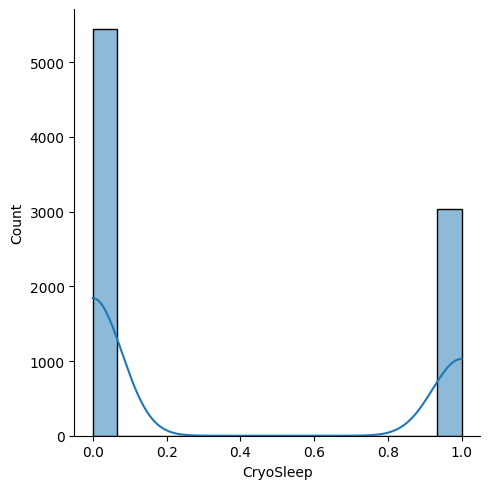

In [99]:
sns.displot(df['CryoSleep'], kde = True)

In [100]:
df['CryoSleep'] = df['CryoSleep'].fillna(df['CryoSleep'].mode()[0]) # Mode is better to use because of being Categorical

<ipython-input-100-668e80c5b0bf>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CryoSleep'] = df['CryoSleep'].fillna(df['CryoSleep'].mode()[0]) # Mode is better to use because of being Categorical


In [101]:
df.isnull().sum()

,0
HomePlanet,0
CryoSleep,0
Destination,182
Age,994
VIP,0
RoomService,181
FoodCourt,183
ShoppingMall,208
Spa,183
VRDeck,188


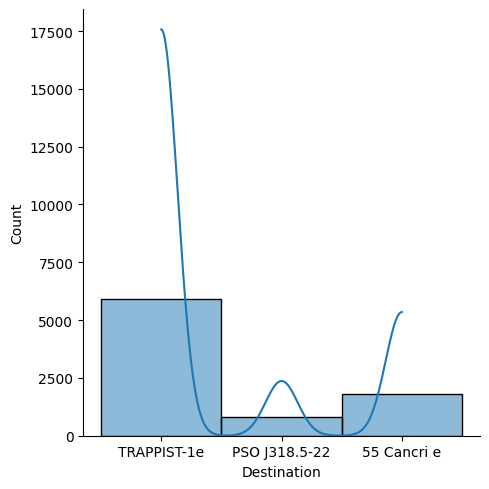

In [103]:
sns.displot(df['Destination'], kde = True)

In [104]:
df['Destination'] = df['Destination'].fillna(df['Destination'].mode()[0])

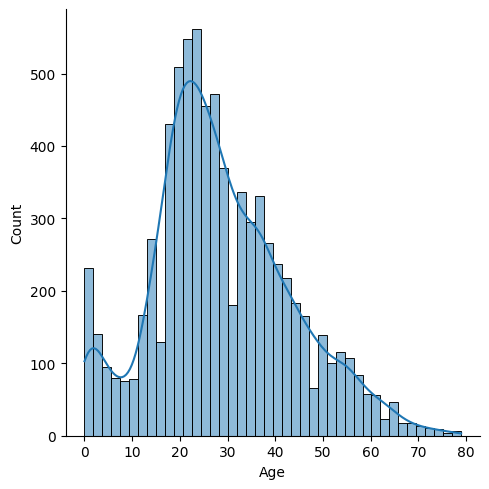

In [105]:
sns.displot(df['Age'], kde = True)

In [106]:
df['Age'] = df['Age'].fillna(df['Age'].median()) # because it is right-skewed. if it had a normal dist the best imputation would be the mean

In [107]:
df.isnull().sum()

,0
HomePlanet,0
CryoSleep,0
Destination,0
Age,0
VIP,0
RoomService,181
FoodCourt,183
ShoppingMall,208
Spa,183
VRDeck,188


<Axes: xlabel='RoomService', ylabel='Count'>

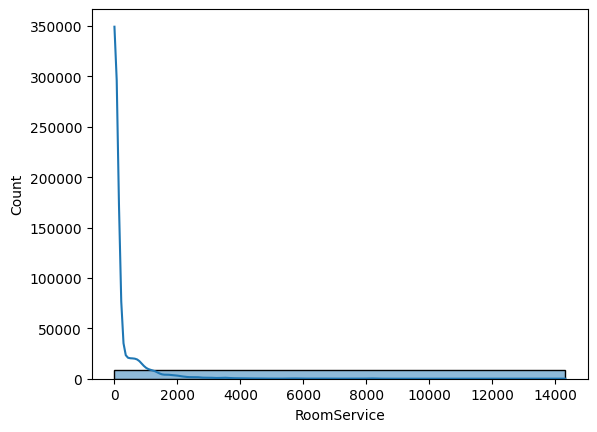

In [114]:
sns.histplot(df['RoomService'], kde = True, bins=1)

In [115]:
df['RoomService'] = df['RoomService'].fillna(df['RoomService'].median()) # Highly right-skewed - hence median used and numerical

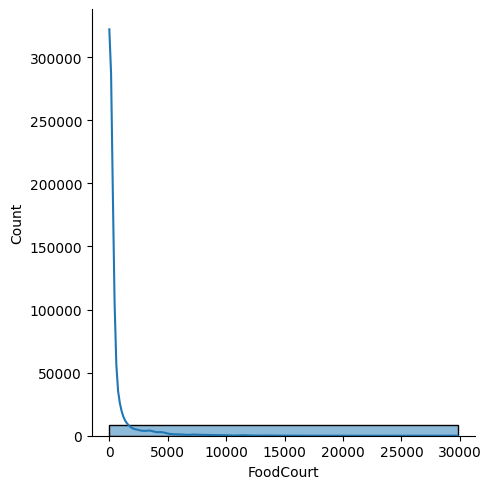

In [133]:
sns.displot(df['FoodCourt'], kde = True, bins = 1)

In [118]:
df['FoodCourt'] = df['FoodCourt'].fillna(df['FoodCourt'].median()) # Highly right-skewed - hence median used and numerical

In [119]:
df.isnull().sum()

,0
HomePlanet,0
CryoSleep,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,208
Spa,183
VRDeck,188


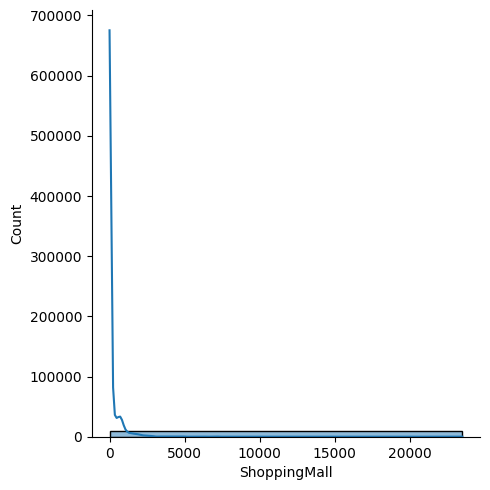

In [134]:
sns.displot(df['ShoppingMall'], kde = True, bins = 1)

In [123]:
df['ShoppingMall'] = df['ShoppingMall'].fillna(df['ShoppingMall'].median()) # Highly right-skewed - hence median used and numerical

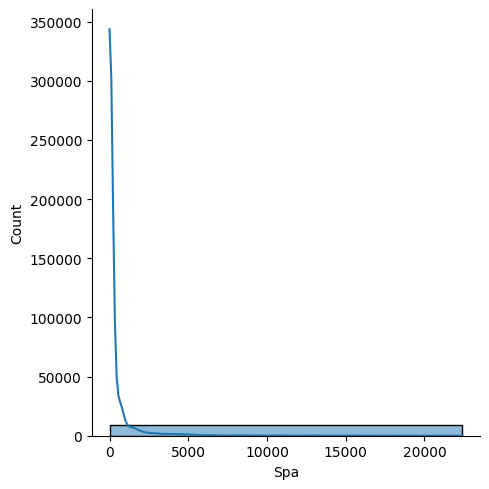

In [135]:
sns.displot(df['Spa'], kde = True, bins = 1)

In [127]:
df['Spa'] = df['Spa'].fillna(df['Spa'].median()) # Highly right-skewed - hence median used and numerical

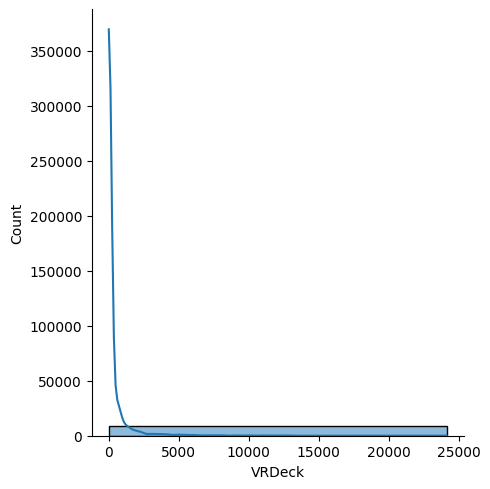

In [136]:
sns.displot(df['VRDeck'], kde = True, bins = 1)

In [131]:
df['VRDeck'] = df['VRDeck'].fillna(df['VRDeck'].median()) # Highly right-skewed - hence median used and numerical

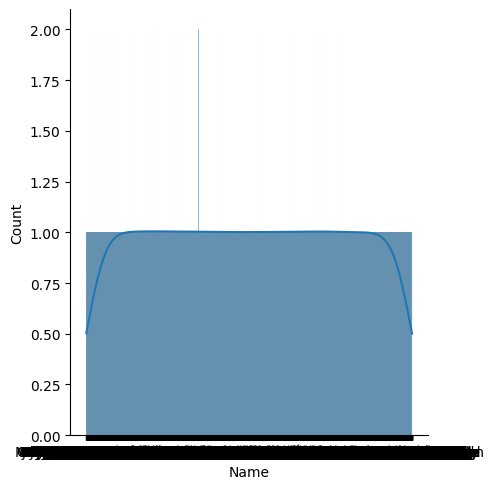

In [139]:
sns.displot(df['Name'], kde = True)

In [141]:
df.isnull().sum()

,0
HomePlanet,0
CryoSleep,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0
VRDeck,0


In [145]:
# into the Name feature now, some of the names are missing even though there are passengerID's on every row. Could be of the reason of Anonymized or incomplete data!
# just for the sake of 'Data Imputation i will impute the missing names as `Missing` '
df['Name'] = df['Name'].fillna('Missing')

In [146]:
df.isnull().sum()

,0
HomePlanet,0
CryoSleep,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0
VRDeck,0


# Data Encoding

Some of the features already are numerical, no need to encode. As we can see also there is not any Ordinal Data to use OrdinalData

In [148]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Missing,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Missing,True
2,Europa,False,TRAPPIST-1e,27.0,True,43.0,3576.0,0.0,6715.0,49.0,Missing,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Missing,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Missing,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Missing,False
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Missing,False
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Missing,True
8691,Europa,False,55 Cancri e,27.0,False,0.0,1049.0,0.0,353.0,3235.0,Missing,False
